In [119]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchmetrics.functional import r2_score, mean_squared_error, mean_absolute_error
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from scipy.spatial.distance import pdist

We moved all the useful functions from the previous assignments to a separate file utils.py. You can simply import them with the following line. Feel free to add additional functions or modify the existing ones!

In [120]:
from utils import MLP, split_data, Dataset, train

In [121]:
# check if a GPU is available
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE

'cpu'

## Molecule sample

In [122]:
molecule = np.array(
    [
        [0.702581, 1.820873],
        [0.702581, 0.296325],
        [-0.702581, -0.296325],
        [-0.702581, -1.820873],
    ]
)

n_atoms = molecule.shape[0]
n_dimensions = molecule.shape[1]

print(
    f"Number of particles: {n_atoms} \nNumber of spatial dimensions: {n_dimensions}",
)

Number of particles: 4 
Number of spatial dimensions: 2


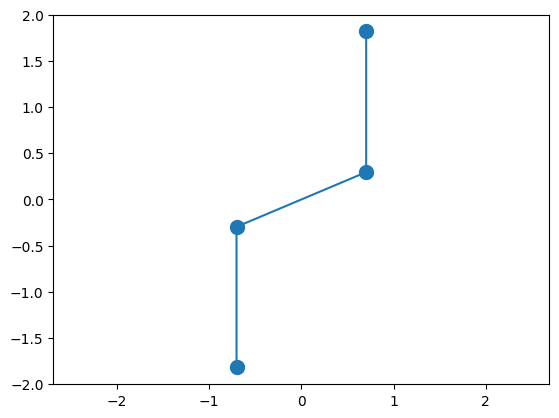

In [123]:
plt.plot(molecule[:, 0], molecule[:, 1], "o-", markersize=10)
plt.axis("equal")

plt.show()

#### 500 random Samples from normal distribution as sample space

In [124]:
# Number of samples to generate
n_samples = 500

# Standard deviation for adding noise
std_dev = 0.1

# Generate random samples and add noise to the equilibrium mol structure
noised_positions = (
    np.random.normal(0, std_dev, size=(n_samples, n_atoms, n_dimensions)) + molecule
)

# Check the shape of the generated data
print(f"Shape of noised positions: {noised_positions.shape}")


Shape of noised positions: (500, 4, 2)


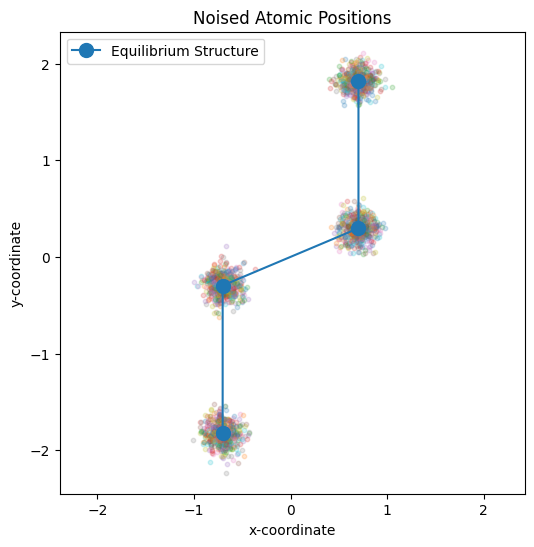

In [125]:
# Visualize the atomic positions
plt.figure(figsize=(6, 6))
for sample in noised_positions:
    plt.scatter(sample[:, 0], sample[:, 1], alpha=0.2, s=10)

# Mark the equilibrium structure
plt.plot(molecule[:, 0], molecule[:, 1], "o-", markersize=10, label="Equilibrium Structure")
plt.title("Noised Atomic Positions")
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.axis("equal")
plt.legend()
plt.show()

## 1.2 Featurization

Here's an example of how to use pdist:

In [126]:
distances = pdist(molecule)
distances

array([1.524548  , 2.54106427, 3.90343364, 1.52502927, 2.54106427,
       1.524548  ])

We can check that these distances are correct:

In [127]:
# Distance atom 0 - 1
print(f"{np.linalg.norm(molecule[0,:] - molecule[1,:]):.6f}")
# Distance atom 0 - 2
print(f"{np.linalg.norm(molecule[0,:] - molecule[2,:]):.6f}")
# Distance atom 0 - 3
print(f"{np.linalg.norm(molecule[0,:] - molecule[3,:]):.6f}")
# Distance atom 1 - 2
print(f"{np.linalg.norm(molecule[1,:] - molecule[2,:]):.6f}")
# Distance atom 1 - 3
print(f"{np.linalg.norm(molecule[1,:] - molecule[3,:]):.6f}")
# Distance atom 2 - 3
print(f"{np.linalg.norm(molecule[2,:] - molecule[3,:]):.6f}")


1.524548
2.541064
3.903434
1.525029
2.541064
1.524548


### Absolute Atomic positions

In [128]:
# Absolute atomic positions/ noised positions reshaped into a rank-1 data
# Arrays are changed into shape (n_samples,n_atoms*n_dimensions)
absolute_positions = noised_positions.reshape(n_samples, n_atoms * n_dimensions)

# We print the shape
print(f"Shape of absolute positions: {absolute_positions.shape}")

Shape of absolute positions: (500, 8)


### Pairwise distances

In [129]:
# distance.pdist to calc pairwise distances for all samples
pairwise_distances = np.array([pdist(sample) for sample in noised_positions])

# checked the sample shape here
n_pairs = pairwise_distances.shape[1]
print(f"Shape of pairwise distances: {pairwise_distances.shape}")

# verified the equillibrium distance for equillibrium structure
distances = pdist(molecule)
print("Pairwise distances for equilibrium structure:", distances)

Shape of pairwise distances: (500, 6)
Pairwise distances for equilibrium structure: [1.524548   2.54106427 3.90343364 1.52502927 2.54106427 1.524548  ]


### Labeling

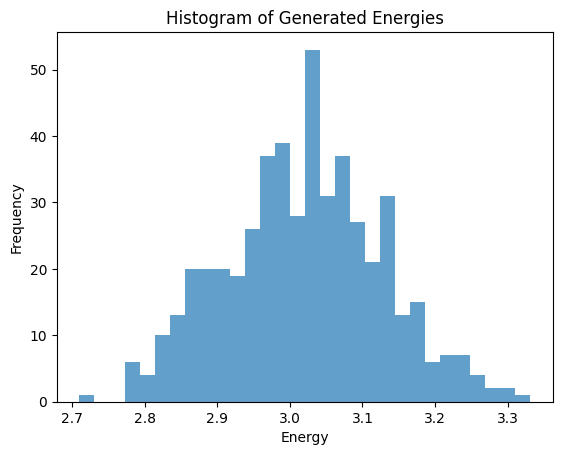

Shape of energies: (500,)


In [130]:
# We labelise general confign by computing energy of each sample
# compute energy for each sample
def compute_energy(pairwise_distances):
    return np.sum(1.0 / pairwise_distances, axis=1)

# calculate energies
energies = compute_energy(pairwise_distances)

# plot histogram of the generated energies
plt.hist(energies, bins=30, alpha=0.7)
plt.title("Histogram of Generated Energies")
plt.xlabel("Energy")
plt.ylabel("Frequency")
plt.show()

# verify the shape
print(f"Shape of energies: {energies.shape}")

### Training of the MLP

In [131]:
# # created 2 Datasets n Dataloaders for abs, pairwise data here
# train_fraction = 0.8
# _, train_data_abs, test_data_abs = split_data(absolute_positions, energies, train_fraction, DEVICE)
# _, train_data_pairwise, test_data_pairwise = split_data(pairwise_distances, energies, train_fraction, DEVICE)

# train_loader_abs = DataLoader(train_data_abs, batch_size=64, shuffle=True)
# train_loader_pairwise = DataLoader(train_data_pairwise, batch_size=64, shuffle=True)

In [132]:
# # Define the MLP training model
# dim_hidden = 128
# mlp_abs = MLP([n_atoms * n_dimensions, dim_hidden, dim_hidden, 1], activation=nn.ReLU()).to(DEVICE)
# mlp_pairwise = MLP([n_pairs, dim_hidden, dim_hidden, 1], activation=nn.ReLU()).to(DEVICE)

# # Loss and optimizer
# criterion = nn.MSELoss()
# optimizer_abs = torch.optim.Adam(mlp_abs.parameters(), lr=0.001)
# optimizer_pairwise = torch.optim.Adam(mlp_pairwise.parameters(), lr=0.001)

c:\Users\Sri Vatsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\Sri Vatsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 50: Loss (Abs): 0.018335, Loss (Pairwise): 0.017731
Epoch 100: Loss (Abs): 0.017872, Loss (Pairwise): 0.018345
Epoch 150: Loss (Abs): 0.018731, Loss (Pairwise): 0.017947
Epoch 200: Loss (Abs): 0.017303, Loss (Pairwise): 0.018229
Epoch 250: Loss (Abs): 0.016358, Loss (Pairwise): 0.015996
Epoch 300: Loss (Abs): 0.015758, Loss (Pairwise): 0.016591
Epoch 350: Loss (Abs): 0.014844, Loss (Pairwise): 0.014201
Epoch 400: Loss (Abs): 0.014003, Loss (Pairwise): 0.014859
Epoch 450: Loss (Abs): 0.013612, Loss (Pairwise): 0.013822
Epoch 500: Loss (Abs): 0.014301, Loss (Pairwise): 0.013943


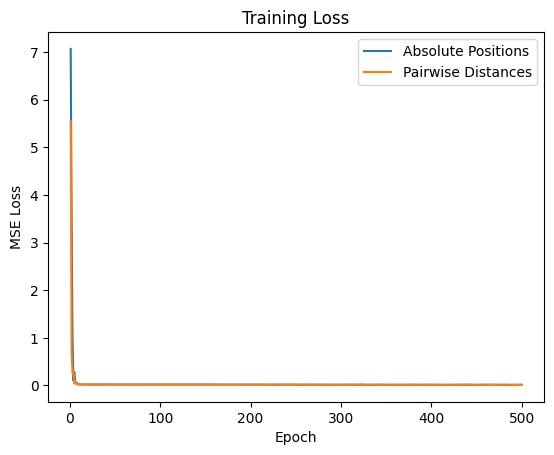

In [133]:
# Create datasets and dataloaders for absolute and pairwise data
train_fraction = 0.8
_, train_data_abs, test_data_abs = split_data(absolute_positions, energies, train_fraction, DEVICE)
_, train_data_pairwise, test_data_pairwise = split_data(pairwise_distances, energies, train_fraction, DEVICE)

train_loader_abs = DataLoader(train_data_abs, batch_size=64, shuffle=True)
train_loader_pairwise = DataLoader(train_data_pairwise, batch_size=64, shuffle=True)

# Define the MLP training models
dim_hidden = 128
mlp_abs = MLP([n_atoms * n_dimensions, dim_hidden, dim_hidden, 1], activation=nn.ReLU()).to(DEVICE)
mlp_pairwise = MLP([n_pairs, dim_hidden, dim_hidden, 1], activation=nn.ReLU()).to(DEVICE)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer_abs = torch.optim.Adam(mlp_abs.parameters(), lr=0.001)
optimizer_pairwise = torch.optim.Adam(mlp_pairwise.parameters(), lr=0.001)

# Training loop
epochs = 500
losses_abs = []
losses_pairwise = []

for epoch in range(1, epochs + 1):
    loss_abs = train(mlp_abs, train_loader_abs, optimizer_abs, criterion, DEVICE)
    loss_pairwise = train(mlp_pairwise, train_loader_pairwise, optimizer_pairwise, criterion, DEVICE)

    # Log loss values
    losses_abs.append(loss_abs)
    losses_pairwise.append(loss_pairwise)

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Loss (Abs): {loss_abs:.6f}, Loss (Pairwise): {loss_pairwise:.6f}")

# Plot training loss for each method
plt.plot(range(1, epochs + 1), losses_abs, label="Absolute Positions")
plt.plot(range(1, epochs + 1), losses_pairwise, label="Pairwise Distances")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()


In [134]:
# evaluate the model
def evaluate(model, data_loader):
    model.eval()
    mse_loss = 0
    with torch.no_grad():
        for data, target in data_loader:
            predictions = model(data)
            mse_loss += criterion(predictions, target).item()
    return mse_loss / len(data_loader)

#calc mse loss
mse_abs_test = evaluate(mlp_abs, DataLoader(test_data_abs, batch_size=64))
mse_pairwise_test = evaluate(mlp_pairwise, DataLoader(test_data_pairwise, batch_size=64))

print(f"Test MSE (Absolute Positions): {mse_abs_test:.6f}")
print(f"Test MSE (Pairwise Distances): {mse_pairwise_test:.6f}")


Test MSE (Absolute Positions): 0.009093
Test MSE (Pairwise Distances): 0.016130


c:\Users\Sri Vatsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([36])) that is different to the input size (torch.Size([36, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


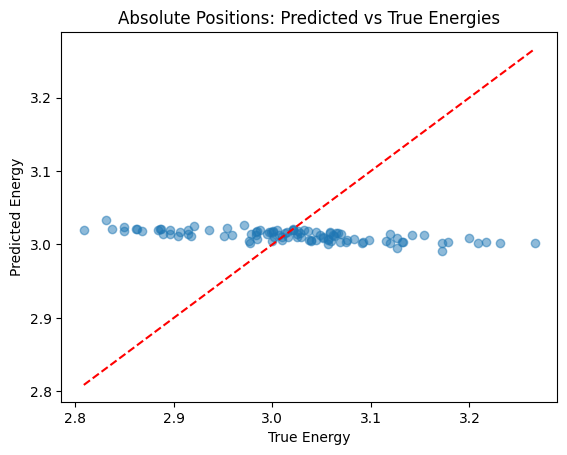

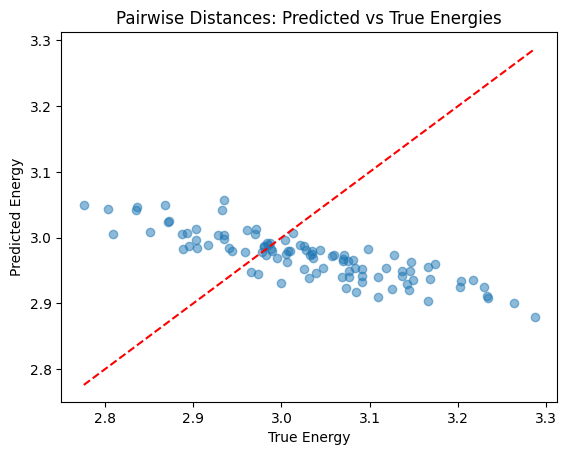

In [135]:
# Predicted vs true energies
def plot_predictions(model, data_loader, title):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for data, target in data_loader:
            predictions = model(data)
            y_true.extend(target.cpu().numpy())
            y_pred.extend(predictions.cpu().numpy())

    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.title(title)
    plt.xlabel("True Energy")
    plt.ylabel("Predicted Energy")
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
    plt.show()

plot_predictions(mlp_abs, DataLoader(test_data_abs, batch_size=64), "Absolute Positions: Predicted vs True Energies")
plot_predictions(mlp_pairwise, DataLoader(test_data_pairwise, batch_size=64), "Pairwise Distances: Predicted vs True Energies")


## 2 Data augmenatation

You can use this function to rotate the samples in your dataset.

In [136]:
def rotate(vector, theta):
    """Rotates a two-dimensional vector by the angle theta."""
    rotMatrix = np.array(
        [[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]
    )
    return np.matmul(rotMatrix, vector)

This is how you can permute data:

In [137]:
ids = [1,2,3,0]
molecule_permuted = molecule[ids,:]

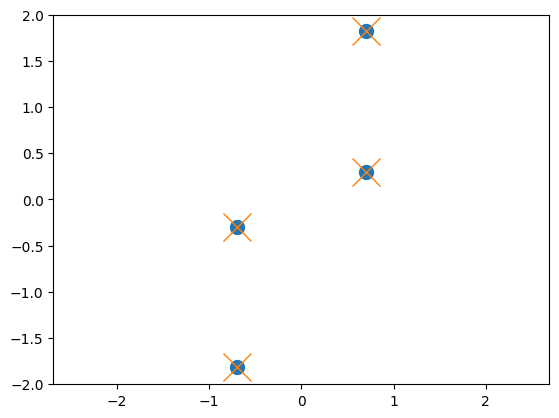

In [138]:
plt.plot(molecule[:, 0], molecule[:, 1], "o", markersize=10)
plt.axis("equal")
plt.plot(molecule_permuted[:, 0], molecule_permuted[:, 1], "x", markersize=20)
plt.axis("equal")

plt.show()

### Rotations

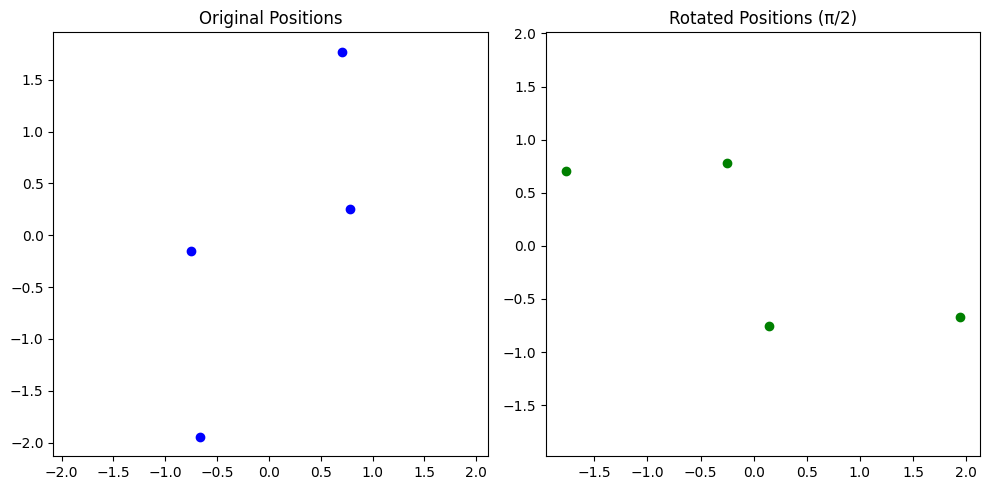

In [142]:
# Rotate the atomic positions by pi/2 for all samples
def rotate_positions(positions, angle=np.pi / 2):
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    return np.dot(positions, rotation_matrix.T)

theta = np.pi / 2  # 90 degrees
rotated_samples = np.array([rotate_positions(molecule, theta) for molecule in noised_positions])

# Visualize the rotated positions for the first sample
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Original
ax[0].scatter(noised_positions[0][:, 0], noised_positions[0][:, 1], color="blue", label="Original")
ax[0].set_title("Original Positions")
ax[0].axis("equal")

# Rotated
ax[1].scatter(rotated_samples[0][:, 0], rotated_samples[0][:, 1], color="green", label="Rotated")
ax[1].set_title("Rotated Positions (π/2)")
ax[1].axis("equal")

plt.tight_layout()
plt.show()


Shape of rotated absolute positions: (500, 8)
Shape of rotated pairwise distances: (500, 6)


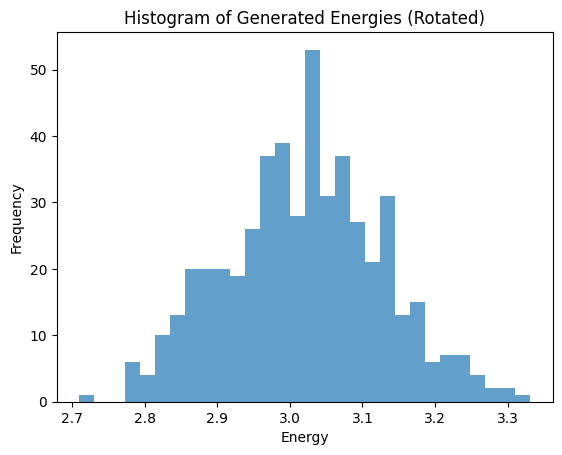

Shape of rotated energies: (500,)


In [141]:
# abs positions for samples
# Absolute atomic positions for rotated samples
rotated_absolute_positions = rotated_samples.reshape(n_samples, n_atoms * n_dimensions)
print(f"Shape of rotated absolute positions: {rotated_absolute_positions.shape}")

# Pairwise distances for rotated samples
rotated_pairwise_distances = np.array([pdist(sample) for sample in rotated_samples])
print(f"Shape of rotated pairwise distances: {rotated_pairwise_distances.shape}")

# Compute energies for the rotated samples
rotated_energies = compute_energy(rotated_pairwise_distances)

# Plot histogram of the generated energies for rotated samples
plt.hist(rotated_energies, bins=30, alpha=0.7)
plt.title("Histogram of Generated Energies (Rotated)")
plt.xlabel("Energy")
plt.ylabel("Frequency")
plt.show()

print(f"Shape of rotated energies: {rotated_energies.shape}")



In [146]:
# Featurize rotated positions
rotated_absolute_positions = rotated_samples.reshape(n_samples, n_atoms * n_dimensions)
rotated_pairwise_distances = np.array([pdist(sample) for sample in rotated_samples])

# Split rotated data into train and test sets
_, train_data_rotated_abs, test_data_rotated_abs = split_data(rotated_absolute_positions, energies, train_fraction, DEVICE)
_, train_data_rotated_pairwise, test_data_rotated_pairwise = split_data(rotated_pairwise_distances, energies, train_fraction, DEVICE)

# Evaluate models on rotated datasets
mse_rotated_abs = evaluate(mlp_abs, DataLoader(test_data_rotated_abs, batch_size=64))
mse_rotated_pairwise = evaluate(mlp_pairwise, DataLoader(test_data_rotated_pairwise, batch_size=64))

print(f"Test MSE on rotated positions (absolute): {mse_rotated_abs:.6f}")
print(f"Test MSE on rotated positions (pairwise): {mse_rotated_pairwise:.6f}")


Test MSE on rotated positions (absolute): 0.753238
Test MSE on rotated positions (pairwise): 0.015595


c:\Users\Sri Vatsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\Sri Vatsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([36])) that is different to the input size (torch.Size([36, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


### Permutations

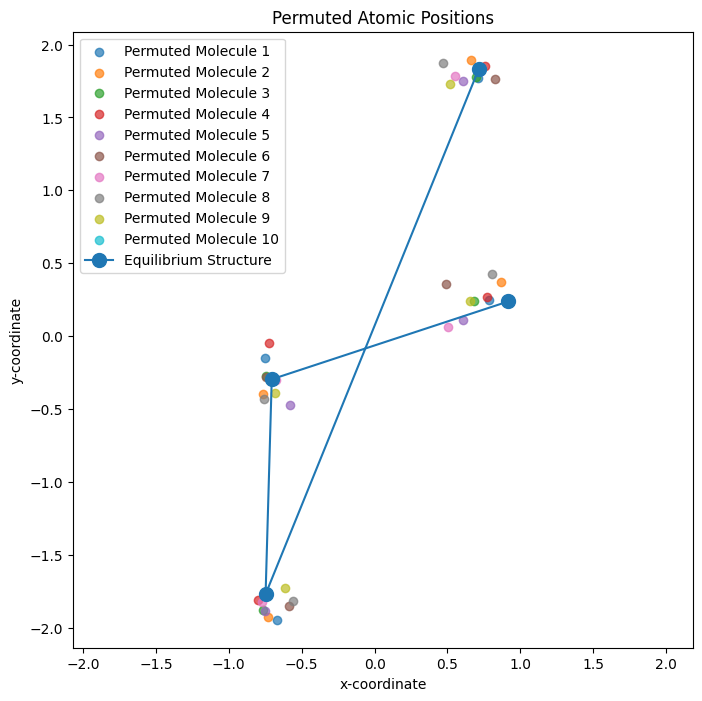

Test MSE on permuted positions (absolute): 0.388963
Test MSE on permuted positions (pairwise): 0.023807


In [147]:
# Permute the atomic positions
permutation = [1, 2, 3, 0]  # Example permutation
permuted_positions = noised_positions[:, permutation, :]

# Visualize permuted positions
plt.figure(figsize=(8, 8))
for i, molecule in enumerate(permuted_positions[:10]):  # Visualize the first 10 molecules
    plt.scatter(molecule[:, 0], molecule[:, 1], alpha=0.7, label=f"Permuted Molecule {i + 1}")
plt.plot(molecule[:, 0], molecule[:, 1], "o-", markersize=10, label="Equilibrium Structure")
plt.title("Permuted Atomic Positions")
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.legend()
plt.axis("equal")
plt.show()

# Featurize permuted positions
permuted_absolute_positions = permuted_positions.reshape(n_samples, n_atoms * n_dimensions)
permuted_pairwise_distances = np.array([pdist(sample) for sample in permuted_positions])

# Split permuted data into train and test sets
_, train_data_permuted_abs, test_data_permuted_abs = split_data(permuted_absolute_positions, energies, train_fraction, DEVICE)
_, train_data_permuted_pairwise, test_data_permuted_pairwise = split_data(permuted_pairwise_distances, energies, train_fraction, DEVICE)

# Evaluate models on permuted datasets
mse_permuted_abs = evaluate(mlp_abs, DataLoader(test_data_permuted_abs, batch_size=64))
mse_permuted_pairwise = evaluate(mlp_pairwise, DataLoader(test_data_permuted_pairwise, batch_size=64))

print(f"Test MSE on permuted positions (absolute): {mse_permuted_abs:.6f}")
print(f"Test MSE on permuted positions (pairwise): {mse_permuted_pairwise:.6f}")


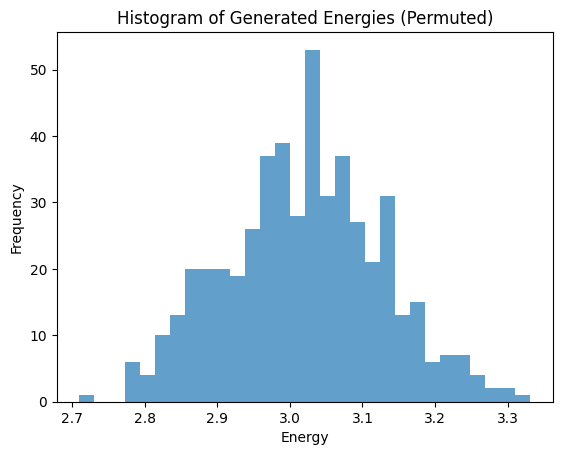

Shape of Permuted energies: (500, 6)


In [153]:
# Compute energies for the rotated samples
permuted_energies = compute_energy(permuted_pairwise_distances)

# Plot histogram of the generated energies for rotated samples
plt.hist(rotated_energies, bins=30, alpha=0.7)
plt.title("Histogram of Generated Energies (Permuted)")
plt.xlabel("Energy")
plt.ylabel("Frequency")
plt.show()

print(f"Shape of Permuted energies: {permuted_pairwise_distances.shape}")

### Augmentation (combining Permutations, Rotations)

In [148]:
# Combine original and rotated positions
combined_abs_positions_a = np.vstack((absolute_positions, rotated_absolute_positions))
combined_pairwise_distances_a = np.vstack((pairwise_distances, rotated_pairwise_distances))

# Combine original and permuted positions
combined_abs_positions_b = np.vstack((absolute_positions, permuted_absolute_positions))
combined_pairwise_distances_b = np.vstack((pairwise_distances, permuted_pairwise_distances))

# Split combined data into train and test sets
_, train_combined_a_abs, test_combined_a_abs = split_data(combined_abs_positions_a, np.tile(energies, 2), train_fraction, DEVICE)
_, train_combined_b_abs, test_combined_b_abs = split_data(combined_abs_positions_b, np.tile(energies, 2), train_fraction, DEVICE)

# Retrain models on augmented datasets
loss_combined_a_abs = train(mlp_abs, DataLoader(train_combined_a_abs, batch_size=64), optimizer_abs, criterion, DEVICE)
loss_combined_b_abs = train(mlp_abs, DataLoader(train_combined_b_abs, batch_size=64), optimizer_abs, criterion, DEVICE)

print(f"Training Loss (Combined Original + Rotated): {loss_combined_a_abs:.6f}")
print(f"Training Loss (Combined Original + Permuted): {loss_combined_b_abs:.6f}")


Training Loss (Combined Original + Rotated): 0.124924
Training Loss (Combined Original + Permuted): 0.044730


c:\Users\Sri Vatsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
